# Prediction and comparison of labels - Hes/Ludwig

### Load packages/libraries

In [1]:
import os
os.chdir('../')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import gdown
import copy as cp
import seaborn as sns
import pandas as pd
import anndata as ad
import pickle
from scipy.sparse import hstack, csc_matrix
import scanpy as sc
import torch

In [3]:
import scarches as sca
import scHPL
from scarches.dataset.trvae.data_handling import remove_sparsity

Global seed set to 0


### Set other parameters

In [4]:
sc.settings.set_figure_params(dpi=1000, frameon=False)
sc.set_figure_params(dpi=1000)
sc.set_figure_params(figsize=(7,7))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

### Import necessary data/objects

In [5]:
#Full AnnData (Hes and Ludwig)
adata_full = sc.read('surgery_model_ludwig_2500/hesludwig_adata_processed_2500.h5ad')
adata_full

AnnData object with n_obs × n_vars = 171868 × 2500
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ratio_nCount_nFeat', 'doubletfinder_class', 'seq_sample', 'treatment', 'single_r_celltypes', 'chen_celltypes', 'tasic_celltypes', 'romanov_celltypes', 'camp1_celltypes_full', 'identity_layer1', 'identity_layer2', 'identity_layer3', 'study', 'cellident_study', '_scvi_batch', '_scvi_labels', 'Unnamed: 0', 'percent.mito', 'percent.ribo', 'cell.type', 'neuronal.subtype', 'cell_barcode', 'ref_query1'
    var: 'mvp.mean-0', 'mvp.dispersion-0', 'mvp.dispersion.scaled-0', 'mvp.variable-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable_nbatches-0', 'highly_variable_intersection-0'
    layers: 'counts'

In [6]:
#Full latent representation (Hes and Ludwig)
full_latent = sc.read('full_model_2500/full_latent_2500.h5ad')
full_latent

AnnData object with n_obs × n_vars = 171868 × 10
    obs: 'cell_identity', 'orig.ident', 'study', 'leiden'
    uns: 'cell_identity_colors', 'leiden', 'neighbors', 'orig.ident_colors', 'study_colors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [7]:
##Read the tree
file_to_read = open('full_model_2500/tree_full_HesLudwig_2500.pickle', 'rb')
tree_rq = pickle.load(file_to_read)
file_to_read.close()

#### *Prediction*

In [8]:
#Using the full reference tree
heslud_pred = scHPL.predict.predict_labels(full_latent.X, tree = tree_rq)

In [9]:
#Save the resulting object
file_to_store = open('prediction_verification_hesludwig_2500/hesludwig_pred_2500.pickle', 'wb')
pickle.dump(heslud_pred, file_to_store)
file_to_store.close()

Transfer labels

In [10]:
heslud_pred[0]

array(['mixed_neurons1_Hes', 'Neur_Glu1_ludwig', 'APNTS_astrocyte_Hes',
       'mixed_neurons3_Hes', 'Ca_permeable_astrocyte_Hes',
       'myelinating_intermediate_OL_Hes', 'COE_Hes', ...,
       'APNTS_ependymocyte_Hes', 'Neur_Glu2_ludwig',
       'Ca_permeable_astrocyte_Hes', 'APNTS_ependymocyte_Hes',
       'Neur_GABA2_ludwig', 'Neur_Glu1_ludwig', 'Neur_Glu2_ludwig'],
      dtype='<U31')

In [11]:
full_latent.obs['pred_identity_layer3'] = heslud_pred[0]
adata_full.obs['pred_identity_layer3'] = heslud_pred[0]

In [12]:
adata_full.obs

,orig.ident,nCount_RNA,nFeature_RNA,ratio_nCount_nFeat,doubletfinder_class,seq_sample,treatment,single_r_celltypes,chen_celltypes,tasic_celltypes,...,_scvi_batch,_scvi_labels,Unnamed: 0,percent.mito,percent.ribo,cell.type,neuronal.subtype,cell_barcode,ref_query1,pred_identity_layer3
adlib_Sample_3893_AT_7_AAACCCAAGAGCAGAA-1-0,adlib,9986.0,4007,2.492139,Singlet,adlib_Sample_3893_AT_7,ad_libitum_fed,Neurons,Glu4,Unclassified,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,mixed_neurons1_Hes
adlib_Sample_3893_AT_7_AAACCCAAGCAATAAC-1-0,adlib,8078.0,3570,2.262745,Singlet,adlib_Sample_3893_AT_7,ad_libitum_fed,Neurons,Glu7,Unclassified,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,Neur_Glu1_ludwig
adlib_Sample_3893_AT_7_AAACCCAAGGATTTGA-1-0,adlib,3178.0,1750,1.816000,Singlet,adlib_Sample_3893_AT_7,ad_libitum_fed,Astrocytes,Astro,Astrocyte,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,APNTS_astrocyte_Hes
adlib_Sample_3893_AT_7_AAACCCAAGTCATGAA-1-0,adlib,8151.0,3529,2.309719,Singlet,adlib_Sample_3893_AT_7,ad_libitum_fed,Neurons,Glu6,GABA-ergic Neuron,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,mixed_neurons3_Hes
adlib_Sample_3893_AT_7_AAACCCAAGTTAGAAC-1-0,adlib,2300.0,1374,1.673945,Singlet,adlib_Sample_3893_AT_7,ad_libitum_fed,Astrocytes,GABA1,Astrocyte,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,Ca_permeable_astrocyte_Hes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25V_TTTGTCAAGACGCACA-1,ludwig,1072.0,689,NaN,NaN,25V,adlib_vehicle,NaN,NaN,NaN,...,6,0,25V_TTTGTCAAGACGCACA,0.000933,0.004664,Tanycyte-like cells,Glial cells,TTTGTCAAGACGCACA,1,Ca_permeable_astrocyte_Hes
25V_TTTGTCAAGCGTGTCC-1,ludwig,892.0,611,NaN,NaN,25V,adlib_vehicle,NaN,NaN,NaN,...,6,0,25V_TTTGTCAAGCGTGTCC,0.001121,0.006726,Ependymal cells,Glial cells,TTTGTCAAGCGTGTCC,1,APNTS_ependymocyte_Hes
25V_TTTGTCAAGGATCGCA-1,ludwig,1710.0,1056,NaN,NaN,25V,adlib_vehicle,NaN,NaN,NaN,...,6,0,25V_TTTGTCAAGGATCGCA,0.000000,0.007602,Neurons,GABA2,TTTGTCAAGGATCGCA,1,Neur_GABA2_ludwig
25V_TTTGTCAAGGCTAGGT-1,ludwig,2597.0,1418,NaN,NaN,25V,adlib_vehicle,NaN,NaN,NaN,...,6,0,25V_TTTGTCAAGGCTAGGT,0.000000,0.004621,Neurons,Glu1,TTTGTCAAGGCTAGGT,1,Neur_Glu1_ludwig


We generated a heatmap to visualize the original label of the cells and their predicted label.

In [13]:
#Order labels for the heatmap
order=[ 'APNTS_astrocyte_Hes', 'APNTS_endothelial_Hes', 'APNTS_ependymocyte_Hes', 'A_M2_Hes', 'Ano2_Hes', 'COE_Atp10a_Hes', 'COE_Hes',
       'COE_Pamr1_Hes', 'Ca_permeable_astrocyte_Hes', 'Cmss1_Hes', 'GLP1_Hes', 'Gabra6_Hes', 'Golli_related_Hes', 'Lmo3_Hes', 'Lnc1_Hes', 
       'Lnc2_Hes', 'M0_Hes', 'M2_Hes', 'M3_Hes', 'Mecom_Hes', 'Microglia_ludwig', 'NFI_Hes', 'Neur_Chat1_ludwig', 'Neur_Chat2_ludwig', 
       'Neur_GABA2_ludwig', 'Neur_GABA4_ludwig', 'Neur_GABA5_ludwig', 'Neur_GABA6_ludwig', 'Neur_Glu1_ludwig', 'Neur_Glu2_ludwig', 
       'Neur_Glu3_ludwig', 'Neur_Glu4_ludwig', 'Neur_Glu5_ludwig', 'Neur_Glu6_ludwig', 'Neur_Glu7_ludwig', 'Neur_Glu8_ludwig', 
       'Neur_Glu9_ludwig','Neur_Glu10_ludwig', 'Neur_Glu11_ludwig', 'Neur_Glu13_ludwig', 'Neur_Glu15_ludwig', 'OPC_Hes',
       'Oligodendrocytes_ludwig', 'Rorb_Maf_Hes', 'Sall3_Cdh3_Hes', 'Sall3_Nox4_Hes', 'Sall3_Rorb_Hes', 'Tpbg_Hes', 'Vglut1_Hes',
       'Zeb2_Kcnmb2_Hes', 'Zeb2_Spon1_Hes', 'Zeb2_Zfp831_Hes', 'mixed_neurons1_Hes', 'mixed_neurons2_Hes', 'mixed_neurons3_Hes', 
       'mixed_neurons4_Hes', 'myelin_related_astrocyte_Hes', 'myelinating_OL_Hes', 'myelinating_intermediate_OL_Hes', 'pH_related_Hes', 
       'p_fibroblast_Hes', 'paradoxic_Hes', 'pericyte_Hes', 'preganglionic2_Hes', 'premyelinating_OL_Hes', 'resting_microglia_Hes', 
       's_fibroblast_Hes', 'smooth_muscle_Hes', 'tanycyte_Hes',
       
        'astrocyte', 'glial', 'magnaclass1', 'magnaclass2', 'monoamine_class', 'neuron',
        'Rejected (RE)', 'Rejection (dist)', 'root' ]

order2=[ 'APNTS_astrocyte_Hes', 'Astrocytes_ludwig', 'APNTS_endothelial_Hes', 'Endothelial_ludwig', 'APNTS_ependymocyte_Hes', 'Ependymal_ludwig',
        'A_M2_Hes', 'Ano2_Hes', 'COE_Atp10a_Hes', 'COE_Hes', 'COE_Pamr1_Hes', 'Ca_permeable_astrocyte_Hes', 'Cmss1_Hes', 'GLP1_Hes', 
        'Gabra6_Hes', 'Golli_related_Hes', 'Lmo3_Hes', 'Lnc1_Hes', 'Lnc2_Hes', 'M0_Hes', 'M1_Hes', 'M2_Hes', 'M3_Hes', 'Mecom_Hes', 
        'Microglia_ludwig', 'NFI_Hes', 'Neur_Chat1_ludwig', 'Neur_Chat2_ludwig', 'Neur_Chat3_ludwig', 'Neur_GABA1_ludwig', 'Neur_GABA2_ludwig', 
        'Neur_GABA3_ludwig','Neur_GABA4_ludwig', 'Neur_GABA5_ludwig', 'Neur_GABA6_ludwig', 'Neur_GABA7_ludwig','Neur_Glu1_ludwig', 
        'Neur_Glu2_ludwig', 'Neur_Glu3_ludwig', 'Neur_Glu4_ludwig', 'Neur_Glu5_ludwig', 'Neur_Glu6_ludwig', 'Neur_Glu7_ludwig', 
        'Neur_Glu8_ludwig', 'Neur_Glu9_ludwig','Neur_Glu10_ludwig', 'Neur_Glu11_ludwig', 'Neur_Glu12_ludwig','Neur_Glu13_ludwig', 
        'Neur_Glu15_ludwig', 'OPC_Hes', 'OPCs_ludwig', 'Oligodendrocytes_ludwig', 'Rorb_Maf_Hes', 'Sall3_Cdh3_Hes', 'Sall3_Nox4_Hes', 
        'Sall3_Rorb_Hes', 'Tpbg_Hes', 'Vglut1_Hes','Zeb2_Kcnmb2_Hes', 'Zeb2_Spon1_Hes', 'Zeb2_Zfp831_Hes', 'mixed_neurons1_Hes', 
        'mixed_neurons2_Hes', 'mixed_neurons3_Hes', 'mixed_neurons4_Hes', 'myelin_related_astrocyte_Hes', 'myelinating_OL_Hes', 
        'myelinating_intermediate_OL_Hes', 'pH_related_Hes', 'p_fibroblast_Hes', 'VLMCs_ludwig','paradoxic_Hes', 'pericyte_Hes', 
        'preganglionic1_Hes', 'preganglionic2_Hes', 'premyelinating_OL_Hes','resting_microglia_Hes', 's_fibroblast_Hes', 'smooth_muscle_Hes',
        'tanycyte_Hes', 'Tanycyte-like_ludwig',
       
        'astrocyte', 'glial', 'magnaclass1', 'magnaclass2', 'monoamine_class', 'neuron',
        'Rejected (RE)', 'Rejection (dist)', 'root' ]

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/pyplot.py'>

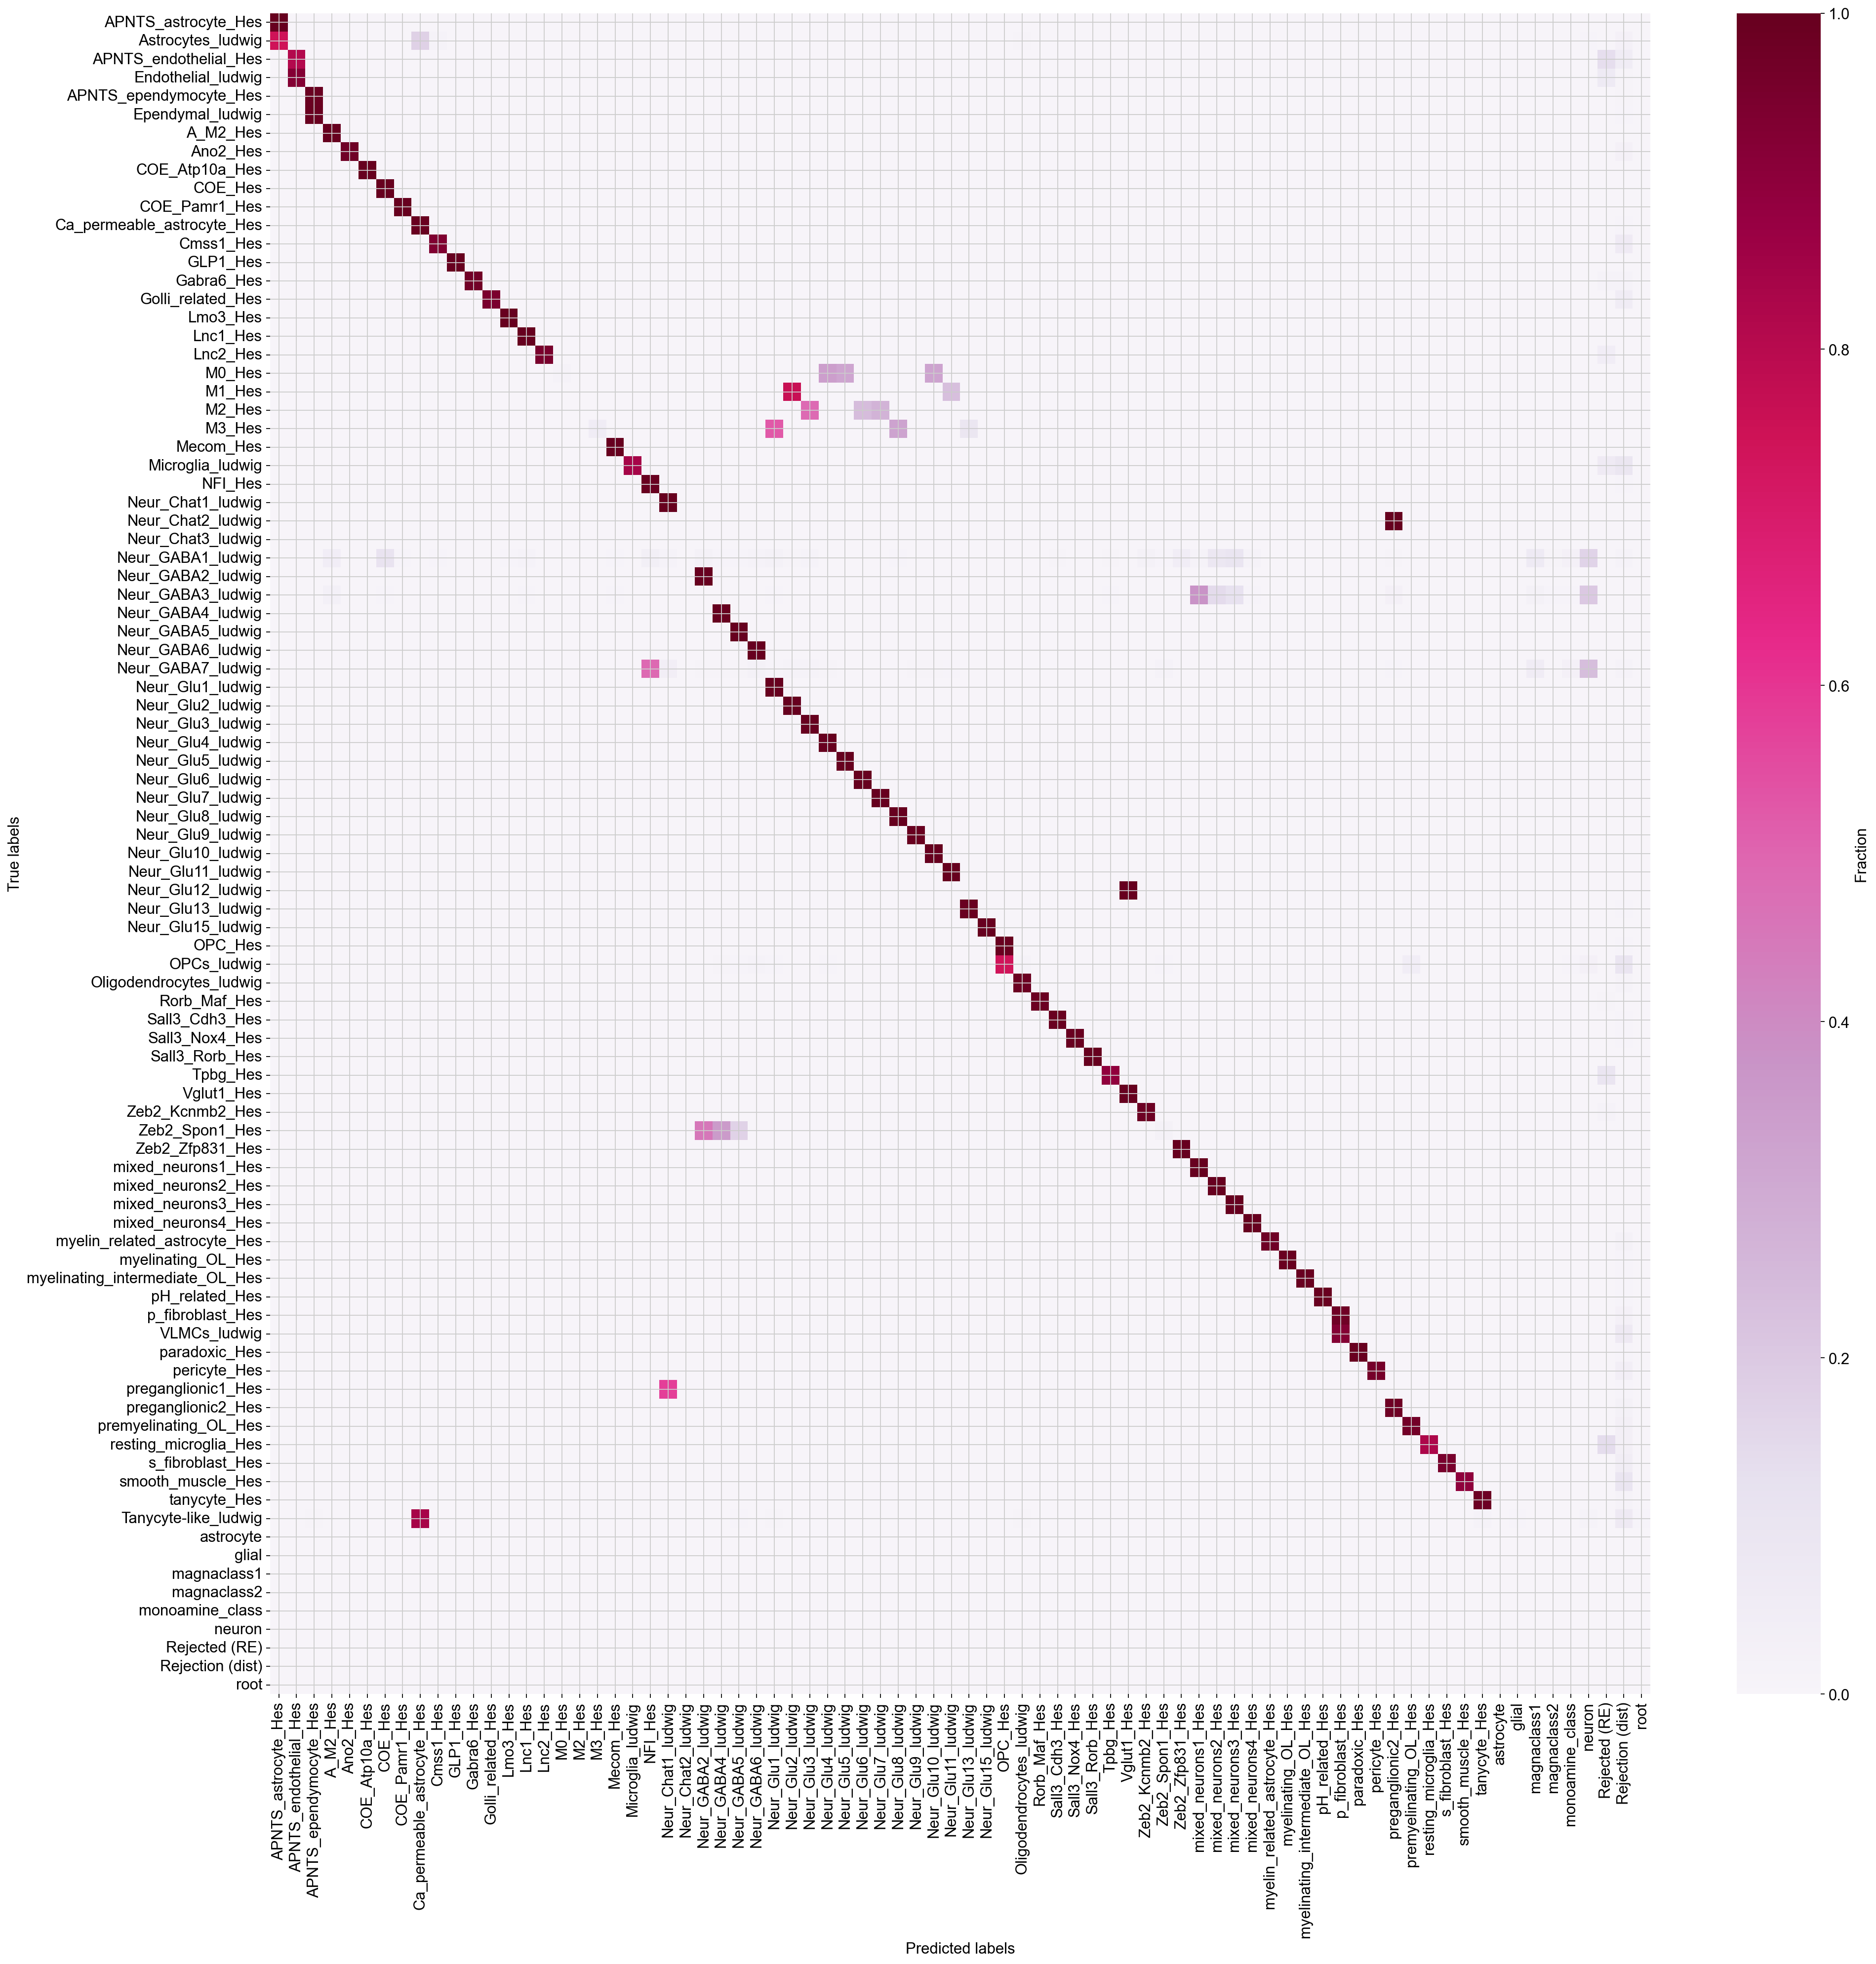

In [14]:
#Compare original labels with the predicted ones
scHPL.evaluate.heatmap(full_latent.obs['cell_identity'], full_latent.obs['pred_identity_layer3'], shape=[28,28], cmap="PuRd", 
                       order_cols=order, order_rows=order2)

In [15]:
#Save the labeled latent space and dataset
full_latent.write('prediction_verification_hesludwig_2500/full_latent_predicted_labels_2500.h5ad')
adata_full.write('prediction_verification_hesludwig_2500/hesludwig_adata_predicted_labels_2500.h5ad')

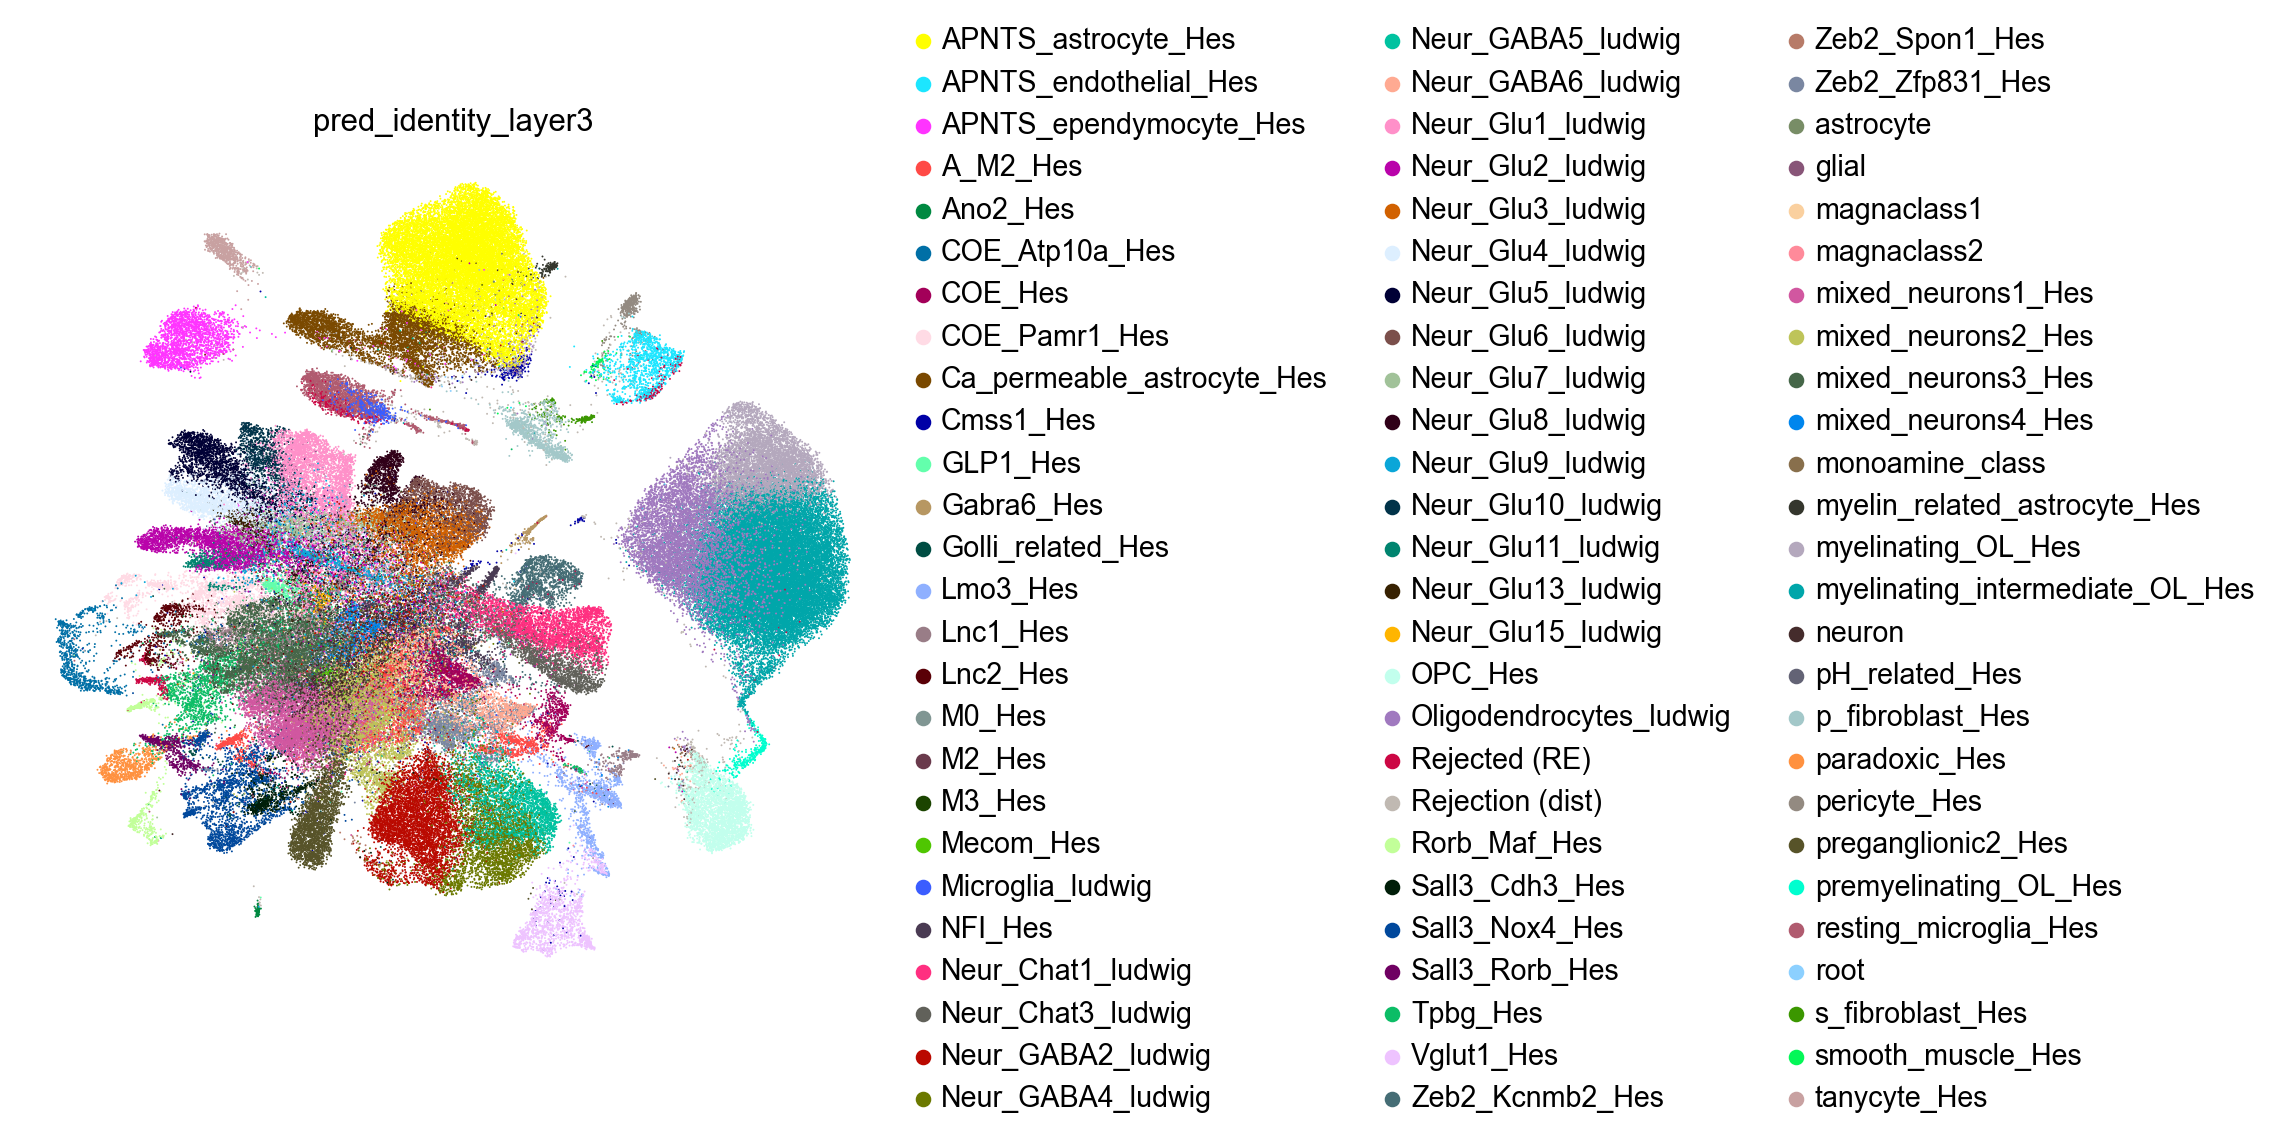

In [16]:
#Plot the predicted cell identities
sc.pl.umap(full_latent,
           color=['pred_identity_layer3'],
           s=3,
           frameon=False)